This script is meant to create a scenario folder & process the flooding maps for the QMRA scenarios

In [108]:
import os
import shutil
import numpy as np
import xugrid as xu
import matplotlib.pyplot as plt


In [109]:
#### User defined settings ####

# set scenario name
Fname = 'Scenario_1' 

# select origin of flood map -> 1 = selected
Dhydro = 0
Sfincs = 1

# set location of the original flood map
mapsDir = '../examples/'           # location of the original flood map
nameFM = 'sfincs_beira_map.nc'     # name of the original flood map

# set bounding box
BB = 1 # 1 = bounding box, 0 = full map

if BB == 1:
    # set bounding box coordinates
    xmin = 0.66e6
    xmax = 0.71e6
    ymin = 7.79e6
    ymax = 7.84e6
  
# Set the required flood map stats for QMRA analysis 
FloodArea = 1
FloodMax  = 0
FloodDur  = 0
FloodNr   = 0

# if FloodArea = 1, choose the timestep, other options create a one time step output
timestep = 10


In [121]:
### Include here check on presence of age pop data ####
# TODO: need to check if age pop data is on the same grid! Otherwise this needs to be done in the age pop preprocessor.

popfile = os.path.join('.','popdata.nc')    

if os.path.exists(popfile):
    print(f"The pop age file is in place.")
else:
    print(f"!!!The pop age file is not in place!!!")


!!!The pop age file is not in place!!!


In [111]:
# Create scenario folder & check whether the folder already exists

try:
    os.mkdir(os.path.join('.',Fname))                   # '.' is used to create the folder in the current directory (relative path)
    print(f"Folder '{Fname}' is created successfully.")
except OSError as error:
    print(f"Warning: '{Fname}' already exists.")


In [112]:
### Copying files from default_ymls to scenario folder ####
# perhaps TODO: check if yamls are already in scenario folder - if so, do not overwrite.

source_folder_path = './default_ymls'
destination_folder_path = os.path.join('.',Fname)

# Get a list of all files in the source folder with the .yml extension
ymls_to_copy = [file 
                for file in os.listdir(source_folder_path) 
                if file.endswith('.yml')]
try:
    # Iterate through the list of files and copy each one to the destination folder
    for file_to_copy in ymls_to_copy:
        source_file_path = os.path.join(source_folder_path, file_to_copy)
        destination_file_path = os.path.join(destination_folder_path, file_to_copy)
        shutil.copy(source_file_path, destination_file_path)

    print("Files copied successfully.")
except FileNotFoundError:
    print("Source folder not found.")
except IOError as e:
    print(f"Error occurred while copying the files: {e}")

Files copied successfully.


In [113]:
# switch between D-Hydro and Sfincs output - move upward

if Dhydro == 1:
    param = 'Mesh2d_waterdepth'
    print('D-Hydro output selected')
elif Sfincs == 1:
    param = 'zs'
    print('Sfincs output selected')
else:
    print('Please select either D-Hydro or Sfincs output')

Sfincs output selected


In [114]:
# read in flood map data
tFlood = xu.open_dataset(mapsDir+ nameFM)

# copy it to a new file
FN_Flood = tFlood.copy()  

# delete the old file
tFlood.close()
del tFlood

In [115]:
### Set bounding box ###

if BB == 1:
    FN_Flood = FN_Flood.ugrid.sel(x=slice(xmin,xmax), y=slice(ymin,ymax))

In [116]:
#### create the scenario values ####

temp = FN_Flood[param][:] # select the parameter of interest

# FloodedArea -> replace values <0.1 m with NaN

if FloodArea == 1:
    temp["FloodedArea"]=FN_Flood.variables[param].isel(time=timestep)
    temp["FloodedArea"] = temp["FloodedArea"].assign_attrs({"units": "cell_size", "long_name": "Flooded area","standard_name": "FloodedArea"})
    
    # replace values <0.1 m with NaN
    temp["FloodedArea"][:] = np.where(temp["FloodedArea"][:] < 0.1, np.nan, temp["FloodedArea"][:])

# Maximum flood height -> select maximum water depth values over time period per cell

if FloodMax == 1:
    print("Maximum flood height is under construction")
    #temp["MaxFloodHeight"] = FN_Flood["Mesh2d_waterdepth"][:]
    #temp["MaxFloodHeight"] = temp["MaxFloodHeight"].assign_attrs({"units": "cell_size", "long_name": "max height of the flood per cell","standard_name": "MaxFloodHeight"})
    # TODO: create the proper code

# Flood duration -> select max duration of flood per cell

if FloodDur == 1:
    print("Maximum flood height is under construction")
    #temp["MaxFloodduration"] = FN_Flood["Mesh2d_waterdepth"][:]
    #temp["MaxFloodduration"] = temp["MaxFloodduration"].assign_attrs({"units": "cell_size", "long_name": "max duration of a flood (cons. days)","standard_name": "MaxFloodduration"})
    # TODO: create the proper code

# Flood number -> select number of floods per cell per model run

if FloodNr == 1:
    print("Maximum flood height is under construction")
    #temp["MaxFloodNr"] = FN_Flood["Mesh2d_waterdepth"][:]
    #temp["MaxFloodNr"] = temp["MaxFloodNr"].assign_attrs({"units": "cell_size", "long_name": "number of floods per cell","standard_name": "MaxFloodNr"})
    # TODO: create the proper code

In [117]:
### write the flood scenario to a netcdf file ###

temp.ugrid.to_netcdf(destination_folder_path + '\\' + 'Floodscenariots.nc')

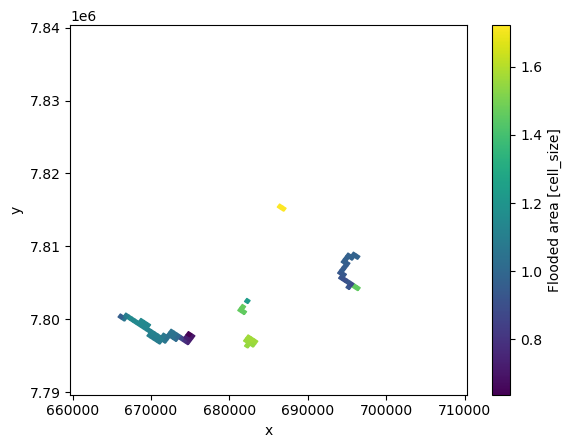

In [118]:
### if needed for inspecting the data -> Plot the flood map
#temp["FloodedArea"].isel(time=45).ugrid.plot()
temp["FloodedArea"].ugrid.plot()

In [119]:
# just for script testing purposes
#%reset -f
